<a href="https://colab.research.google.com/github/Anny-Verly/Projeto-Python-MASL/blob/main/Caderno_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <center>  </center>

# <center> Caderno 2
# <center> Representações Matemáticas de Sistemas de Controle </center>


##2.1 Sistemas Lineares e Invariantes no Tempo

<p align="justify"> A classe particular de sistemas que possuem características de linearidade e invariância temporal podem ser representadas por modelos Lineares e Invariantes no Tempo (L.I.T). Dessa forma, podem-se destacar as três principais formas de representação de modelos contínuos L.I.T:

* Equações Diferenciais Ordinárias (E.D.Os).

* Função de Transferência.

* Modelo em Espaço de Estados.


<p align="justify"> A Figura 2.1 apresenta as relações de transformações de modelos no domínio do
tempo para o domínio da frequência. Pode-se notar que quando $x(t)$ é um impulso, $y(t)$ é a resposta ao impulso do sistema, logo $H(s)$, que descreve a F.T, é a resposta ao impulso do sistema. As próximas seções são dedicadas a realizar essas representações de forma computacional, utilizando o Colab.


 <center>

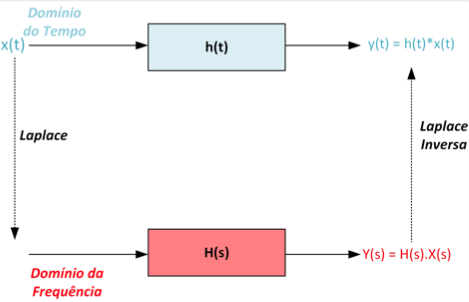

Figura 2.1  </center>

##2.2 Representação em Função de Transferência

<p align="justify">Em um sistema LIT, a Função de Transferência (FT) é a relação matemática entre a entrada e a saída no domínio da frequência com condições iniciais nulas.

 Antes de prosseguirmos para a representação dessa função, apresentaremos  uma biblioteca que permite fazer uma modelagem e simulação de sistema de controle, o **[PYTHON-CONTROL](https://python-control.readthedocs.io/en/0.10.0/)**.

Para que possamos compreender melhor a utilização de uma biblioteca, como o Python Control, vamos entender por meio de imaginação. Visualize um aluno de curso de graduação em engenharia que carregue em sua mochila uma pasta (biblioteca) vazia. Ao longo do tempo, ele escreve em uma folha de papel algumas fórmulas matemáticas, tabelas e outras informações relevantes. No entanto uma folha não é o suficiente, logo precisará adicionar mais elementos nela e, portanto, tais folhas precisam estar organizadas na pasta para facilitar a busca por essas anotações e sempre que precisar deverá estar acessível como forma de consulta.
Assim funciona, de maneira bem didática, uma biblioteca, ou seja, todas as
vezes que precisamos realizar uma operação matemática, usamos uma biblioteca que contenha todas as fórmulas, instruções, dados para que possamos resolvermos problemas matemáticos.

Desta forma o pacote **PYTHON-CONTROL** possui internamente todas as instruções com as seguintes características:

* Sistemas de entrada/saída lineares no domínio do espaço de estados e da frequência.
* Álgebra de diagramas de blocos: conexões em série, paralelas, de realimentação e outras.
* Resposta no tempo: inicial, degrau, impulso.
* Resposta em frequência: gráficos de Bode, Nyquist e Nichols.
* Análise de controle: estabilidade, alcançabilidade, observabilidade, margens de estabilidade, locus de raízes.
* Projeto de controle: posicionamento de autovalores, regulador quadrático linear, sisotool, hinfsyn, rootlocus_pid_designer.
* Projeto de estimadores: estimador quadrático linear (filtro de Kalman).
* Sistemas não lineares: controle baseado em otimização, funções descritivas, planicidade diferencial.


Para instalar você pode executar o seguinte comando:

In [ ]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 2.7 MB/s eta 0:00:00


Em seguida, importá-la. Depois atribuiremos um nome que, no nosso exemplo, será abreviado para ctl.

In [ ]:
import control as ctl

A partir de agora estaremos habilitados a implementar funções de controle. O próximo passo é informar ao sistema que queremos a função de transferência descrito em termo da variável **"s"**.

In [ ]:
# Definindo a variável s como simbólica
s = ctl.tf('s')

No Python, a função responsável por fazer a representação do sistema é mostrado na fórmula abaixo.

\begin{equation}
H_s = ctl.tf(numerador, denominador) \\ ou \\  
H_s = \frac{numerador}{denominador}\\
\end{equation}

Podemos expressar os termos do numerador e denominador de duas formas. A primeira usando a forma de vetor:

In [ ]:
  numerador = [1]
  denominador = [1.0, 2]

Vamos testar a primeira função e imprimir na tela.

In [ ]:
H_s = ctl.tf(numerador, denominador)
print(H_s)

A segunda, usando na forma de expressão matemática, é:

In [ ]:
numerador = 1   # Numerador da FT
denominador = s+2 # Denominador da FT

O resultado da segunda função é:

In [ ]:
H_s = numerador/denominador
print(H_s)

**Exemplo 2.1:**

Neste exemplo deseja-se realizar a modelagem de um circuito RLC (filtro passa
baixa passivo), mostrado na Figura 6, de modo a obter a EDO e a FT que o representam.

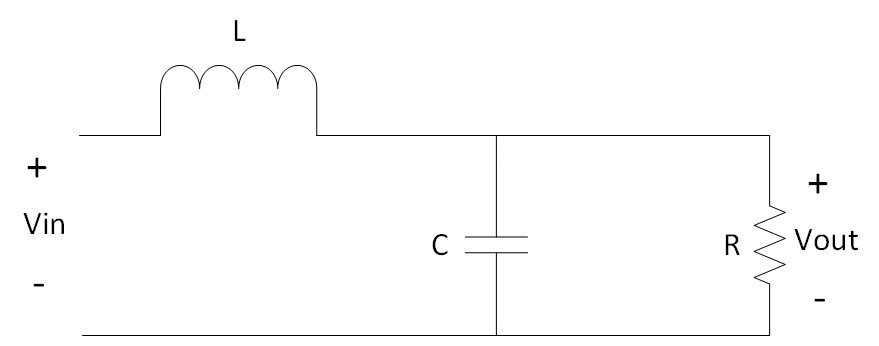

Dados:

* $ V_{in}(t) = A.sen(2.\pi.f.t); $
* $ A = 1.0 [V]; f = 10^4 Hz; R = 10Ω; L = 10^{−3}H; C = 10^{−6}F $

A relação entre a entrada e a saída deste sistema é apresentado na Equação 2.1

$$ \frac{d^2Vout(t)}{dt^2} = \frac{V_{in}(t) - V_{out}(t) - \frac{L}{R} \frac{dVout(t)}{dt} }{LC} $$
<p align ="right">(2.1)</p>

Ao isolar a tensão de entrada, obtém-se a Equação 2.2

$$ V_{in}(t) = V_{out}(t) + \frac{dVout(t)}{dt} + LC \frac{d^2Vout(t)}{dt^2}$$
<p align ="right">(2.2)</p>

A FT é obtida aplicando a Transformada de Laplace de ambos os lados da equação
anterior e isolando os termos conforme mostrado na Equação 2.3

$$ \frac{V_{out}(s)}{V_{in}(s) = \frac{1}{1 + \frac{L}{R} + LCs^2 }} $$
<p align ="right">(2.3)</p>

O algoritmo implementado em Python para declarar a FT é mostrado abaixo.

In [ ]:
# Definindo a variável s como simbólica
s = ctl.tf('s')
# Dados do problema:
A = 1.0;
f = 1e+4;
R = 10;   # Resistor [Ohm]
L = 1e-3; # Indutor [H]
C = 1e-6; # Capacitor [F]
num = 1   # Numerador da FT
den = 1 + (L/R)*s + L*C*s**2 # Denominador da FT
FT = num / den
print(FT)

###2.2.1 Função de Transferência de Sistemas em Cascata

Sistemas mais complexos são compostos por diversos subsistemas. Quando estes
subsistemas estão conectados em série o denominamos de sistemas em cascata. A Figura 7 mostra esse tipo de operação.

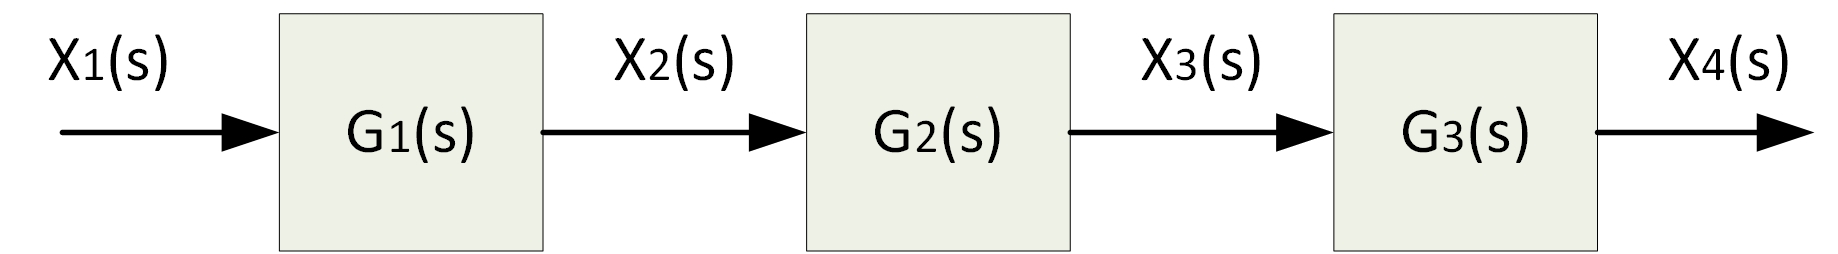

Sabe-se que as FT’s individuais são dadas por:

$$ G_1(s) = \frac{X_2(s)}{X_1(s)} ; G_2(s) = \frac{X_3(s)}{X_2(s)} G_3(s) = \frac{X_4(s)}{X_3(s)} ; $$

E a FT resultante de todo o sistema é dada pela Equação 2.4

$$ G(s) = \frac{X_4(s)}{X_1(s)} = \frac{X_2(s).X_3(s).X_4(s)}{X_1(s).X_2(s).X_3(s)} = G_1(s).G_2(s).G_3(s) $$
<p align ="right">(2.4)</p>

Ou seja, a FT de um sistema constituído pela cascata de subsistemas nada mais é
que o produto das FTs de cada subsistema. Sendo assim, no Python utiliza-se o operador '*', conforme mostrado abaixo:

$$ FT = FT_1*FT_2*FT_3* \cdots *FT_N $$

###2.2.2 Função de Transferência de Sistemas em Paralelo
Uma outra configuração muito comum é a paralela. Os subsistemas em paralelo
possuem uma entrada comum e uma saída composta pela soma algébrica das saídas de
todos subsistemas. A Figura 8 ilustra esta configuração.

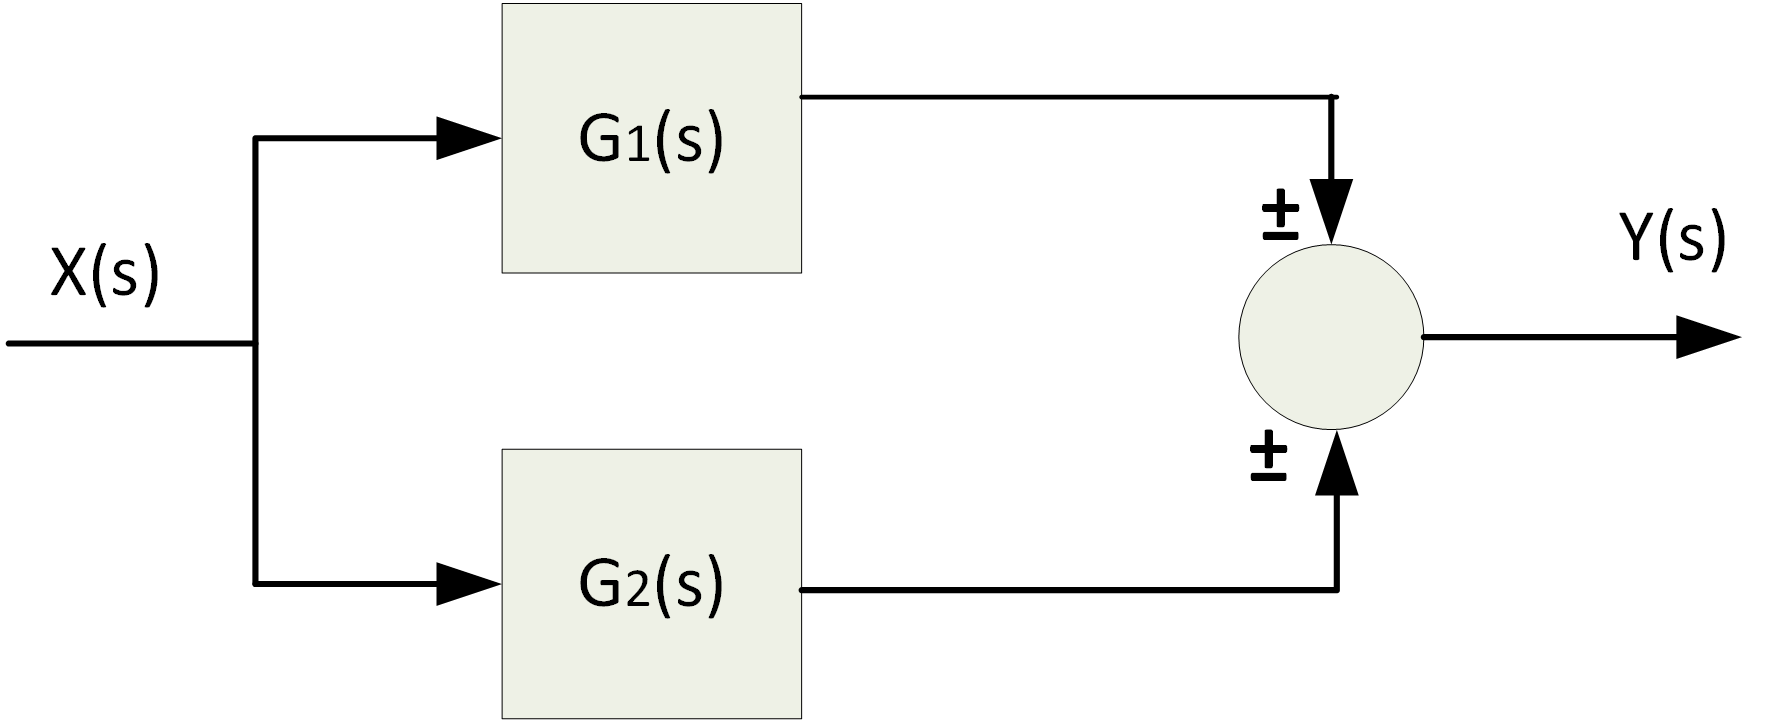

A FT resultante após esta operação é dada pela Equação 2.5

$$ G(s) = G_1(s) \pm G_2(s) $$
<p align ="right">(2.5)</p>

Ou seja, a FT de um sistema constituído pela operação paralela de subsistemas
nada mais é que a soma algébrica das FTs de cada subsistema. Sendo assim, no Python utilizam-se os operadores '+' ou '-', conforme mostrado abaixo:

$$ FT = FT_1 \pm FT_2 \pm FT_3 \pm \cdots \pm FT_N $$



###2.2.3 Função de Transferência de Sistemas em Malha Fechada
Um sistema em Malha Fechada (MF) usa uma medida do sinal de saída, Y(s), e a
comparação com a saída desejada, X(s), para gerar um sinal de erro, Ea(s) que é usado pelo controlador para ajustar o atuador. Esta operação pode ser vista na Figura 9.

A Função de Transferência em Malha Fechada (FTMF) é dada pela Equação 2.6

$$ T(s) = \frac{Y(s)}{X(s)} = \frac{1}{1+G(s).H(s)} $$
<p align ="right">(2.6)</p>

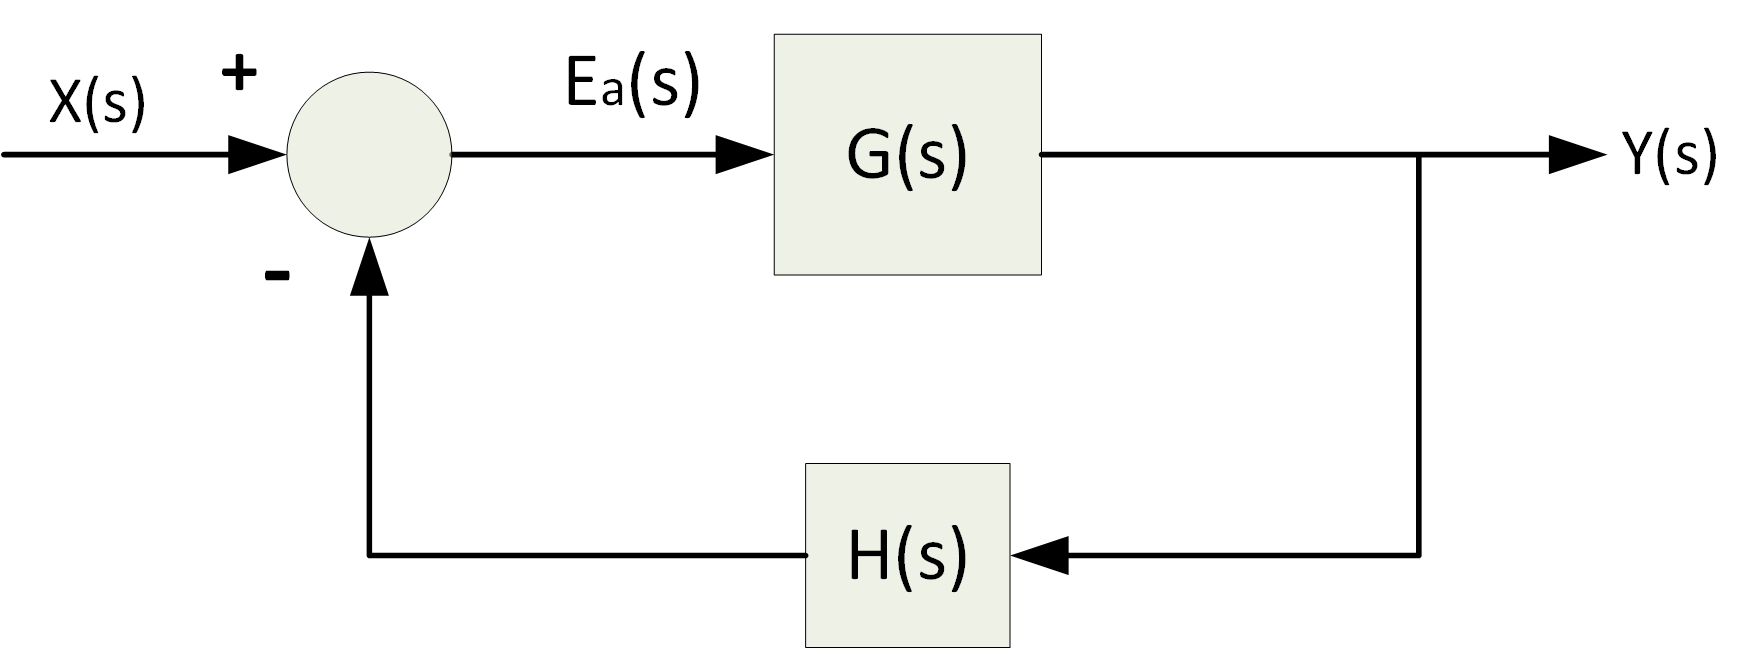

No Python, a forma de obter a FTMF é bem simples. Basta utilizar o seguinte comando:

$$ FTMF = ctl.feedback(G,H,-1) $$

onde, **G** e **H** representam as Funções de Transferência de Ramo direto e de realimentação, respectivamente.

**Exemplo 2.2:**
Utilizar o Python para a obtenção da FT resultante do sistema mostrado na Figura 10.

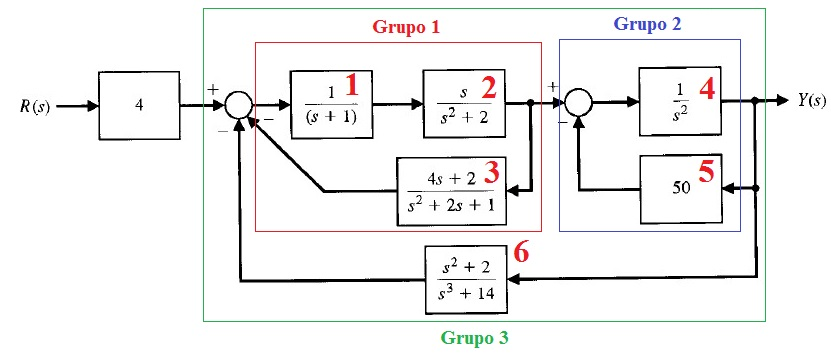

DICA: Subdividir o sistema em blocos e grupos para facilitar a implementação e a
identificação dos mesmos.

Solução em Python:

In [ ]:
# Exemplo 2.2:
s = ctl.tf('s')

# Funções de transferência de cada bloco - 1 ao 6
num = 1
den = s + 1
FT1 = num/den                     # Bloco 1
#-----------------------------------------
num = s
den = s**2 + 2
FT2 = num/den                     # Bloco 2
#-----------------------------------------
num = 4*s + 2
den = s**2 + 2*s + 1
FT3 = num/den                     # Bloco 3
#-----------------------------------------
num = 1
den = s**2
FT4 = num/den                     # Bloco 4
#-----------------------------------------
num = 50
den = s**0
FT5 = num/den                     # Bloco 5
#-----------------------------------------
num = s**2 + 2
den = s**3 + 14
FT6 = num/den                     # Bloco 6
#-----------------------------------------
# Funções de transferência de cada grupo
G = FT1*FT2
H = FT3
FTG1 = ctl.feedback(G,H,-1)       # Grupo 1
#-----------------------------------------
G = FT4
H = FT5
FTG2  = ctl.feedback(G,H,-1)      # Grupo 2
#-----------------------------------------
G = FTG1*FTG2
H = FT6
FTG3  = ctl.feedback(G,H,-1)      # Grupo 3
#-----------------------------------------

# Função de transferência final:
K = 4 # ganho fora da malha
FTFINAL = 4*FTG3
print(FTFINAL)

##2.3 Representação em Espaço de Estados
A representação em Espaço de Estados (EE) de qualquer sistema LIT pode ser feita conforme mostrado na Equação 2.7,

\begin{equation}
x(t) = Ax(t) + Bu(t)\\
y(t) = Cx(t) + Du(t)
\end{equation}
<p align ="right">(2.7)</p>

Onde **x** é o vetor de estados (uma coleção de todas as variáveis internas usadas para descrever a dinâmica do sistema em estudo), **y** é o vetor de saída e **u** é um vetor de entradas.
Para realizar tal representação no Python também utilizamos a função StateSpace, da
seguinte forma:

$$modEE = ctl.StateSpace(A,B,C,D)$$

Onde, **A**, **B**, **C** e **D** são matrizes constantes.
O Exemplo 2.3 mostra a representação do circuito RLC (Exemplo 2.1) no espaço
de estados.


**Exemplo 2.3:**


Para representar o circuito da Figura 6 em EE executa-se os seguintes passos:

1 – Escolha das Variáveis do Modelo:

a) Vetor de Estados: $ x = (I_L(t), V_c(t))$.

b) Vetor de Entrada: $u = (Vin(t))$.

c) Vetor de Saída: $u = (V_{out}(t))$.

2 – Escreva as equações associadas na forma de x˙(t) = Ax(t) + Bu(t)
a) Para a corrente no indutor (Equação 2.8):

$$ I_L = \frac{1}{L}.V_L(t) = \frac{1}{L}.(V_{in} - V_c(t)) = - \frac{1}{L}.V_C(t) +\frac{1}{L}.V_{in}(t) $$

b) Para a tensão no capacitor (Equação 2.9):

$$ I_L = \frac{1}{C}.I_C(t) = \frac{1}{C}.(I_L - I_R(t)) = - \frac{1}{C}.I_L(t) +\frac{1}{RC}.I_{C}(t) $$

Desse modo

$$
 \begin{bmatrix}
  I_L(t)  \\
  V_C(t)  \\
 \end{bmatrix}
 =
 \begin{bmatrix}
  0 & -\frac{1}{L} \\
  \frac{1}{C} & -\frac{1}{RC}
 \end{bmatrix}
 .
 \begin{bmatrix}
  I_L(t) \\
  V_C(t)
\end{bmatrix}
 +
\begin{bmatrix}
\frac{1}{L} \\
  0
\end{bmatrix}
.
\begin{bmatrix}
V_{in}(t)
\end{bmatrix}
$$

3 – Escreva a equação de saída na forma de $y(t) = Cx(t) + Du(t)$

$$
\begin{bmatrix}
V_{out}(t)
\end{bmatrix}
=
\begin{bmatrix}
0 & 1
\end{bmatrix}
.
\begin{bmatrix}
  I_L(t)  \\
  V_C(t)  \\
\end{bmatrix}
+
\begin{bmatrix}
0
\end{bmatrix}
.
\begin{bmatrix}
V_{in}(t)
\end{bmatrix}
$$

Os valores de R, L e são os mesmo do exemplo anterior.

A descrição do modelo em EE é mostrada abaixo.

In [ ]:
# Exemplo 2.3
R = 10;   # Resistor [Ohm]
L = 1e-3; # Indutor [H]
C = 1e-6; # Capacitor [F]
# Matrizes do Sistema
A = [ [0, -1/L], [1/C, -1/(R*C)] ]
B = [ [1/L], [0]]
C = [ [0, 1] ]
D = [ [0] ]
# Matrizes do Sistema
modEE = ctl.StateSpace(A,B,C,D)
print(modEE)

##2.4 Conversão entre Representações
Nas seções 2.2 e 2.3 mostrou-se como é feita a representação de sistemas lineares utilizando a função de transferência e o modelo em espaço de estados, respectivamente.
Para obter a representação em FT a partir do modelo em EE utiliza-se a função
ss2ft, conforme mostrado abaixo:

$$ ctl.ss2tf(modEE) $$

Ainda assim é possível obter representaçãos em Espaço de Estado a partir do FT:

$$ ctl.tf2ss(FT) $$

**Exemplo 2.4**
Considerando novamente o circuito RLC mostrado na Figura 6 e as suas representações em função de transferência e em espaço de estados dadas pelas equações 2.3 e 2.10, respectivamente. Tais transformações são mostradas abaixo.

In [ ]:
R = 10;   # Resistor [Ohm]
L = 1e-3; # Indutor [H]
C = 1e-6; # Capacitor [F]
# Matrizes do Sistema
A = [ [0, -1/L], [1/C, -1/(R*C)] ]
B = [ [1/L], [0]]
C = [ [0, 1] ]
D = [ [0] ]
# Representação em EE
modEE = ctl.StateSpace(A,B,C,D)
print(modEE)

In [ ]:
# Conversão de Espaço de Estado para FT:
FT = ctl.ss2tf(modEE)
print(FT)

In [ ]:
# Conversão de FT para Espaço de Estado:
EE = ctl.tf2ss(FT)
print(EE)

##2.5 Estudo de Caso: Azimute de Antena, uma Introdução aos Sistemas de Controle de Posição

Um sistema de controle de posição converte um comando de entrada de posição
em uma resposta de saída de posição. Os sistemas de controle de posição encontram uma vasta aplicação em antenas, braços robóticos e acionadores de disco de computadores. O objetivo deste estudo é analisar em detalhes um sistema de controle de posição de azimute de antena, que poderia ser utilizada para posicionar uma antena de rádio telescópica, por exemplo.

O sistema de controle de posição de azimute de antena, pode ser visto nas figuras 11, 12 e 13. Em que na Figura 11 é mostrado a concepção do sistema de controle de posição. Na Figura 12 tem-se um esquema detalhado do mesmo e a Figura 13 apresenta o diagrama de blocos funcional.

O objetivo deste sistema é fazer com que a saída do ângulo de azimute da antena
θs(s) siga o ângulo de entrada do potenciômetro, θe(s) . O comando de entrada é um deslocamento angular. Dessa forma o potenciômetro converte o deslocamento angular em uma tensão. Analogamente, o deslocamento angular da saída é convertido em uma tensão pelo potenciômetro da malha de realimentação. Amplificadores de sinal de potência ressaltam a diferença entre as tensões de entrada e de saída. Este sinal de atuação amplificado aciona a planta.

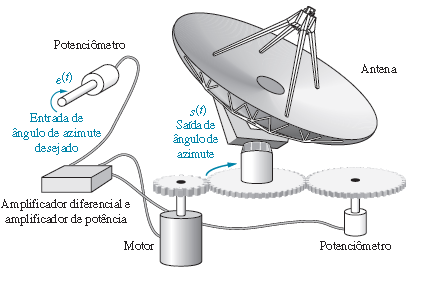</center>

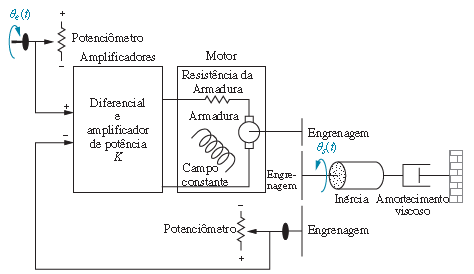

O objetivo do sistema é levar o erro da saída a zero (e(t) = r(t) - y(t)). Dessa
forma quando a entrada e a saída se igualam, o erro é nulo e o motor não gira. Quanto maior a diferença entre a entrada e a saída, maior será a tensão de entrada do motor e consequentemente mais rápido ele irá girar.

A Figura 14 mostra a resposta de posição da saída à medida que o ganho do
amplificador de sinal é variado. Se o ganho for aumentado, então, o motor será acionado mais intensamente e irá girar mais rapidamente em direção à sua posição final. Nesse caso, a maior quantidade de movimento angular pode fazer com o motor ultrapasse seu valor final e sendo forçado a voltar à posição de comando apresente oscilações amortecidas.

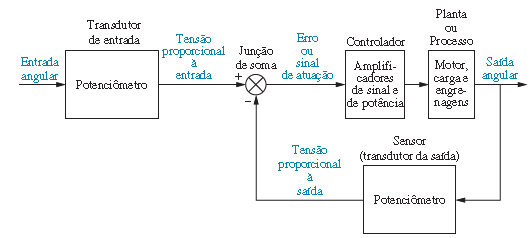</center>

Em uma situação de ganho relativamente menor, o motor pode não apresentar oscilações. Portanto, pode-se verificar que a variação do ganho do amplificador de sinal alterou apenas o regime transitório da saída do sistema.

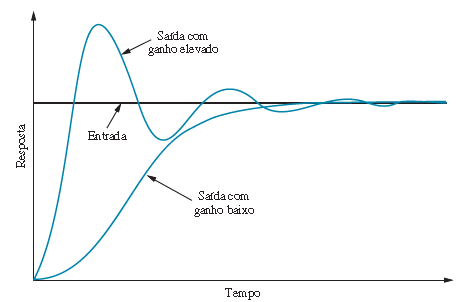

Em alguns sistemas o erro em regime permanente pode não ser nulo, nesse caso um
simples ajuste de ganho para regular a resposta transitória e a permanente pode não ser o suficiente. Para resolver este problema um controlador em conjunto com o amplificador pode ser utilizado. Com um controlador na malha é possível projetar a resposta transitória e a permanente com a exatidão requerida.

Feitas as considerações anteriores faça o que se pede para modelar o sistema de
controle de posição de azimute de antena.

1) Determine a função de transferência para cada subsistema da Figura 13.
Para se modelar os subsistemas individuais considere a Tabela 9.
Tabela 9 – Subsistemas do sistema de controle de posição de azimute de antena (Adaptado de (2)

Subsistema | Entrada | Saída
-----------|---------|------
Potenciômetro de entrada | Deslocamento angular a partir do usuário,$θm(t)$ | Tensão para o pré-amplificador, $vm(t)$
Pré-amplificador | Tensão do potenciômetros,$v_e(t) = v_m(t) - v_s(t)$ | Tensão para o amplificador de potência, $v_p(t)$|
Amplificador de potência | Tensão do pré-amplificador, $v_p(t)$ | Tensão para o motor, $e_a(t)$
Motor | Tensão do amplificador de potência, $e_a(t)$ | Deslocamento angular para a carga, $θ_s(t)$
Potenciômetro de saída | Deslocamento angular da carga, $θ_s(t)$ | Tensão para o pré-amplificador, $v_s(t)$

1.1) Potenciômetro de entrada e de saída (configurados do mesmo modo): Despreze a dinâmica do mesmo e considere apenas uma simples relação de ganho entre o deslocamento de entrada e a tensão de saída. De forma que cada 5 voltas (em qualquer sentido) resulta em uma variação de tensão de 10 volts. Dessa forma, obtenha $V_{en}(s) / θ_{en}(s)$.

1.2) Pré-Amplificador e Amplificador de Potência:
Desprezando a saturação dos amplificadores considere que o circuito que faz a operação $v_e(t) = v_{en}(t) - v_s(t)$ que é dado pelo arranjo da Figura 15. Da mesma figura, deduza que $Ve(s) = Ven(s) - Vs(s)$. Considere ainda que há um ganho do pré-amplificador, de forma que $ \frac{V_p(s)}{V_e(s)} = K $ e que a FT do amplificador de potência é dada pela Equação 2.12.

$$ \frac{E_a(s)}{V_p(s)} = \frac{100}{s+100} $$

1.3) Motor e carga: Obtenha a FT que relaciona o deslocamento angular da carga e a tensão na armadura. Para isso considere $J_a = 0, 02 Kg.m^2, J_c = 1, 0 Kg.m^2, N_1 = 25, N_2 = 250, D_a = 0, 01 N.m.seg/rad, D_c = 1, 0 N.m.seg/rad, K_t = 0, 5 N.m/A, K_e = 0, 5 V.seg/rad e R_a = 8 Ω$.

-> No primeiro momento obtenha as impedâncias refletidas, $J_m e D_m$.
-> Substitua na Equação 2.13.

$$ \frac{\theta_m(s)}{E_a(s)}=\frac{K_t/(R_aJ_m)}{s[s+\frac{1}{J_m}(D_m+\frac{K_tK_{ce}}{R_a})]} $$

-> Utilize a relação $\frac{\theta_1(s)}{\theta_2(s)}=\frac{N_2}{N_1}$ para obter por fim, $\frac{\theta_c(s)}{E_a(s)}$



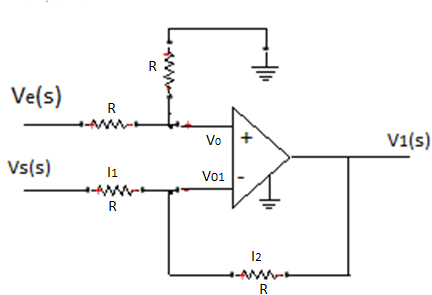

1.4) Represente os resultados dos itens anteriores por meio de diagramas de blocos e preencha a Figura 16.

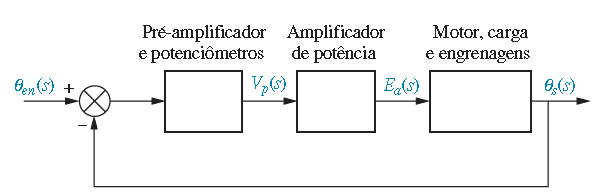

1.5) De posse do diagrama de blocos obtido no item anterior declare as funções de transferência em Python utilizando o comando **ctl.ft()**.

1.6) No Python, utilizando as funções declaradas no item anterior, obtenha a função de transferência em malha fechada resultante que descreve a relação $\frac{\theta_{en}(s)}{\theta_s(s)}$.

2) Obtenha a representação em espaço de estados de cada subsistema dinâmico
da Figura 13, utilizando o diagrama de blocos do item 1.4.

2.1) Representação em espaço de estados do amplificador de potência $\frac{E_a(s)}{V_p(s)} = \frac{100}{s + 100}$: Considere ea(t) como estado que é transferido para saída. Declare o modelo obtido em ambiente Python utilizando a função ctl.ft().

2.2) Representação em espaço de estados do motor com carga: Deduza o modelo em espaço de estados diretamente da física do processo considerando:

→ Levante as equações de Kirchoff das tensões para o circuito da armadura, onde a força contraeletromotriz do motor, vce, em volts, é dada pela Equação 2.14
$$ C_{ce} = K_{ce}\frac{d\theta_m(t)}{dt} $$

→ Levante a equação do sistema mecânico rotacional que relaciona o torque motor, Tm, e o deslocamento $θ_m$.

→ Relacione Tm com $i_a(t)$, por $K_ti_a = T_m$ e substitua $i_a$ da equação da parte mecânica rotacional na equação da malha do circuito.

→ Defina as variáveis de estado por: $x_1 = \theta_m e x_2 = d\theta_m d_t$ e encontre o modelo em EE.
Lembre-se que a saída é θs = \frac{N1}{N2}\theta_m.

→ Por fim, declare o modelo obtido em ambiente Scilab utilizando a função ctl.ft().

**3) Comparação dos resultados**
Utilizando as funções de transferências e os modelos em EE obtidos nos itens
anteriores, aplique os comandos ss2tf e tf2ss para averiguar os resultados.

##2.6 Resumo do capítulo

Neste capítulo foram apresentadas as principais formas de representação matemática de sistemas lineares e invariantes no tempo utilizando o Scilab. Foram mostrados e aplicados comandos essenciais para a representação em FT, em espaço de estados e para a conversão entre representações.

Ao longo das seções foram aplicados os conceitos e comandos para a solução de
um circuito RLC. Ao fim do capítulo é apresentado um estudo de caso baseado em um sistema físico presente no mundo real: controle de posição de azimute de uma antena.